# PROCEDURE
- load a time series
- iterate through each candle 
- check behind and infront of interator

In [30]:
# DATA SERIALIZATION
import pandas as pd
import numpy as np 

# FETCH DATA
import yfinance as yf
from datetime import datetime

# VISUALIZATION
import matplotlib.pyplot as plt

# FETCH DATA

In [31]:
# Data Extraction
start_date = "2020-11-01"
end_date = datetime.now().strftime("%Y-%m-%d")
symbol = "SPY"

# USE YAHOO FINANCE 
data = yf.download(symbol ,  start_date , end_date )
data = data[["Open" , "High" , "Low" , "Close" , "Volume"]]

data.tail(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-11-17,450.239990,451.420013,449.290009,450.790009,83133200
2023-11-20,450.529999,455.130005,450.519989,454.260010,69936200
2023-11-21,453.179993,454.130005,451.959991,453.269989,49244600
2023-11-22,454.980011,456.380005,453.890015,455.019989,59394900
2023-11-24,455.070007,455.500000,454.730011,455.299988,29737400


# IDENTIFY SWING

In [32]:
# Initialize lists to store swing highs and lows along with their dates
swing_highs = []
swing_high_dates = []
swing_lows = []
swing_low_dates = []

# Iterate through data to find swings
for i in range(1, len(data) - 1):
    prev_high = data.iloc[i - 1]['High']
    curr_high = data.iloc[i]['High']
    next_high = data.iloc[i + 1]['High']

    prev_low = data.iloc[i - 1]['Low']
    curr_low = data.iloc[i]['Low']
    next_low = data.iloc[i + 1]['Low']

    is_swing_high = curr_high >= prev_high and curr_high >= next_high
    is_swing_low  = curr_low  <= prev_low  and curr_low  <= next_low

    if is_swing_high:
        swing_highs.append(curr_high)
        swing_high_dates.append(data.index[i])
        print(f"{data.index[i]}: Found a high swing")
        
    if is_swing_low:
        swing_lows.append(curr_low)
        swing_low_dates.append(data.index[i])
        print(f"{data.index[i]}: Found a low swing")


2020-11-05 00:00:00: Found a high swing
2020-11-06 00:00:00: Found a low swing
2020-11-09 00:00:00: Found a high swing
2020-11-10 00:00:00: Found a low swing
2020-11-11 00:00:00: Found a high swing
2020-11-12 00:00:00: Found a low swing
2020-11-16 00:00:00: Found a high swing
2020-11-19 00:00:00: Found a low swing
2020-11-23 00:00:00: Found a low swing
2020-11-24 00:00:00: Found a high swing
2020-11-27 00:00:00: Found a high swing
2020-11-30 00:00:00: Found a low swing
2020-12-01 00:00:00: Found a high swing
2020-12-02 00:00:00: Found a low swing
2020-12-04 00:00:00: Found a high swing
2020-12-09 00:00:00: Found a high swing
2020-12-11 00:00:00: Found a low swing
2020-12-14 00:00:00: Found a high swing
2020-12-17 00:00:00: Found a high swing
2020-12-21 00:00:00: Found a high swing
2020-12-21 00:00:00: Found a low swing
2020-12-23 00:00:00: Found a high swing
2020-12-29 00:00:00: Found a high swing
2020-12-29 00:00:00: Found a low swing
2021-01-04 00:00:00: Found a high swing
2021-01-04

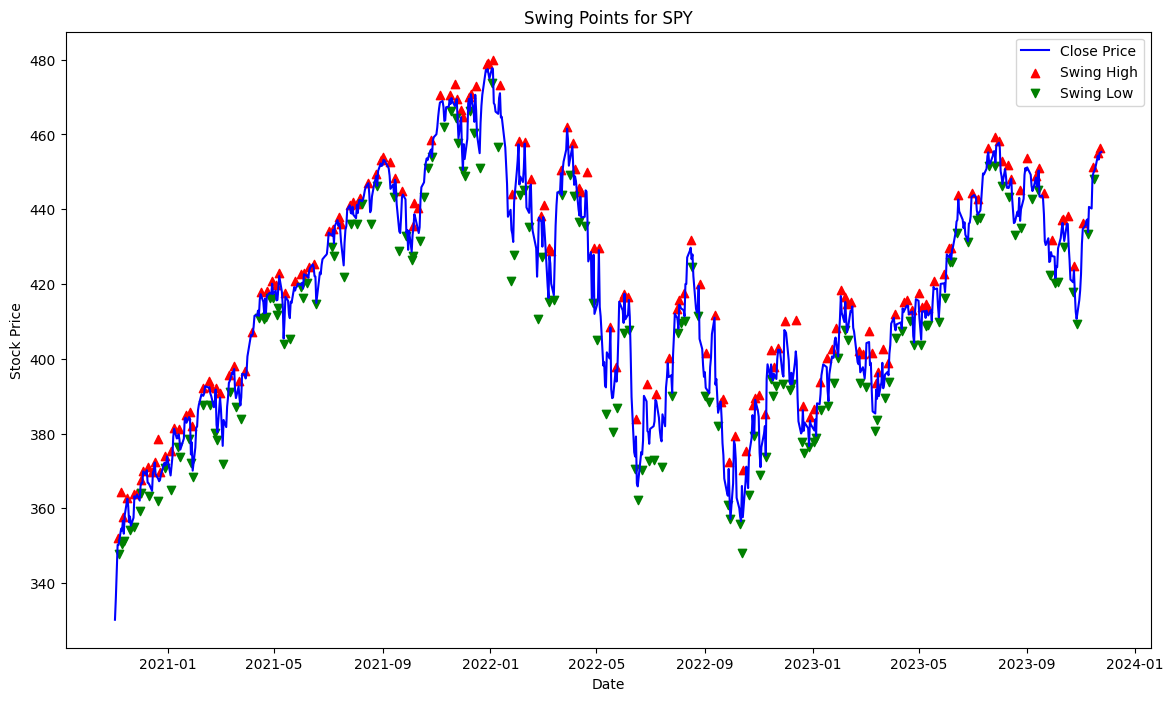

In [33]:
# Create a plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stock price
ax.plot(data.index, data['Close'], label='Close Price', color='blue')

# Add markers for swing highs
ax.scatter(swing_high_dates, swing_highs, label='Swing High', color='red', marker='^')

# Add markers for swing lows
ax.scatter(swing_low_dates, swing_lows, label='Swing Low', color='green', marker='v')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(f'Swing Points for {symbol}')

# Add legend
ax.legend()

# Show the plot
plt.show()


# ITERATIVE ANALYSIS
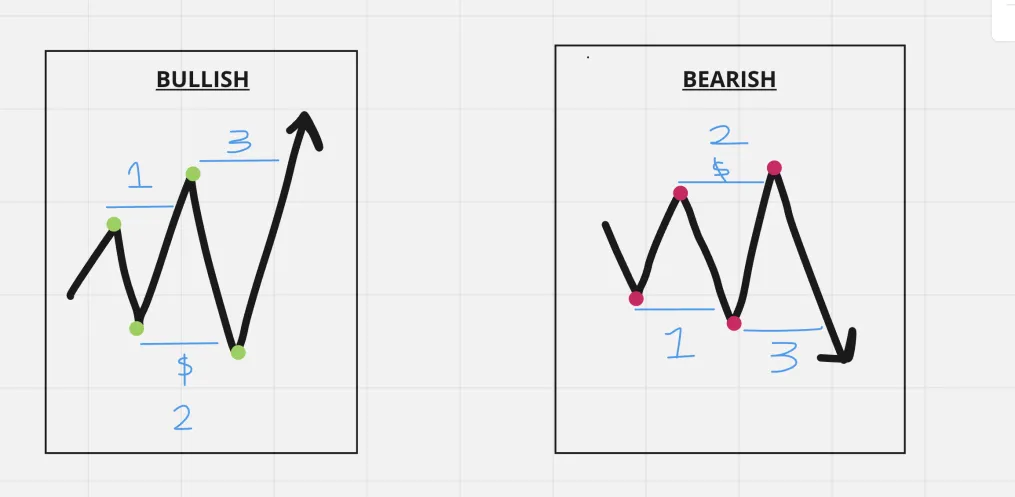

In [34]:
# ITERATIVE LOOK BACK x TICKS
lookback_period = 4

# PARALLEL LISTS LABELING LOOKBACK RUNS
lb_runs = []
lb_labels = []

# PARSE DATA & LABEL LOOKBACK RUN
for i in range(lookback_period-1, len(data), lookback_period):

    # arr =  [ (data.index[x].strftime('%Y-%m-%d %H:%M:%S') , data.iloc[x]["High"]) for x in range(i-lookback_period , i , 1) ]
    arr   =  [ (data.index[x].strftime('%Y-%m-%d') , data.iloc[x]["High"]) for x in range(i-lookback_period , i , 1) ]

    if arr[0][1] > arr[1][1] and arr[1][1] < arr[2][1] and arr[2][1] > arr[3][1]:
        lb_labels.append("bull")
    elif arr[0][1] < arr[1][1] and arr[1][1] > arr[2][1] and arr[2][1] < arr[3][1]:
        lb_labels.append("bear")
    else:
        lb_labels.append("unrecognized")
    lb_runs.append(arr)

# debugging test
for x in range(0, len(lb_runs), 1):
    run_dates =  f"{lb_runs[x][0][0]} --> {lb_runs[x][-1][0]}" 
    print( run_dates , lb_labels[x] )

2023-11-24 --> 2020-11-04 unrecognized
2020-11-05 --> 2020-11-10 bull
2020-11-11 --> 2020-11-16 unrecognized
2020-11-17 --> 2020-11-20 unrecognized
2020-11-23 --> 2020-11-27 bear
2020-11-30 --> 2020-12-03 bear
2020-12-04 --> 2020-12-09 unrecognized
2020-12-10 --> 2020-12-15 bull
2020-12-16 --> 2020-12-21 bear
2020-12-22 --> 2020-12-28 bear
2020-12-29 --> 2021-01-04 unrecognized
2021-01-05 --> 2021-01-08 unrecognized
2021-01-11 --> 2021-01-14 unrecognized
2021-01-15 --> 2021-01-21 unrecognized
2021-01-22 --> 2021-01-27 unrecognized
2021-01-28 --> 2021-02-02 unrecognized
2021-02-03 --> 2021-02-08 unrecognized
2021-02-09 --> 2021-02-12 bear
2021-02-16 --> 2021-02-19 unrecognized
2021-02-22 --> 2021-02-25 bull
2021-02-26 --> 2021-03-03 unrecognized
2021-03-04 --> 2021-03-09 unrecognized
2021-03-10 --> 2021-03-15 bear
2021-03-16 --> 2021-03-19 unrecognized
2021-03-22 --> 2021-03-25 unrecognized
2021-03-26 --> 2021-03-31 bear
2021-04-01 --> 2021-04-07 unrecognized
2021-04-08 --> 2021-04-13 u